# 1. Introduction

## Customer Churn Analysis and Segmentation

This project aims to analyze customer churn and segment customers based on their tenure, monthly charges, and total charges to develop targeted strategies for improving customer retention.

# 2. Data Cleaning and Preparation

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\\Users\HP\Downloads\Customer churn project\customer_churn_data.csv')

# Convert appropriate columns to categorical types
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5880 non-null   object  
 1   gender            5880 non-null   category
 2   SeniorCitizen     5880 non-null   category
 3   Partner           5880 non-null   category
 4   Dependents        5880 non-null   category
 5   tenure            5880 non-null   int64   
 6   PhoneService      5880 non-null   category
 7   MultipleLines     5880 non-null   category
 8   InternetService   5880 non-null   category
 9   OnlineSecurity    5880 non-null   category
 10  OnlineBackup      5880 non-null   category
 11  DeviceProtection  5880 non-null   category
 12  TechSupport       5880 non-null   category
 13  StreamingTV       5880 non-null   category
 14  StreamingMovies   5880 non-null   category
 15  Contract          5880 non-null   category
 16  PaperlessBilling  5880 n

In [7]:
# Convert 'TotalCharges' to numeric for any discrepancies
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values in 'TotalCharges' and handle them
df['TotalCharges'].fillna(0, inplace=True)  # Assuming missing values can be treated as zero

# 3. Exploratory Data Analysis (EDA):
### Distribution of Numerical Features
Analyze the distribution of numerical features such as tenure, MonthlyCharges, and TotalCharges.

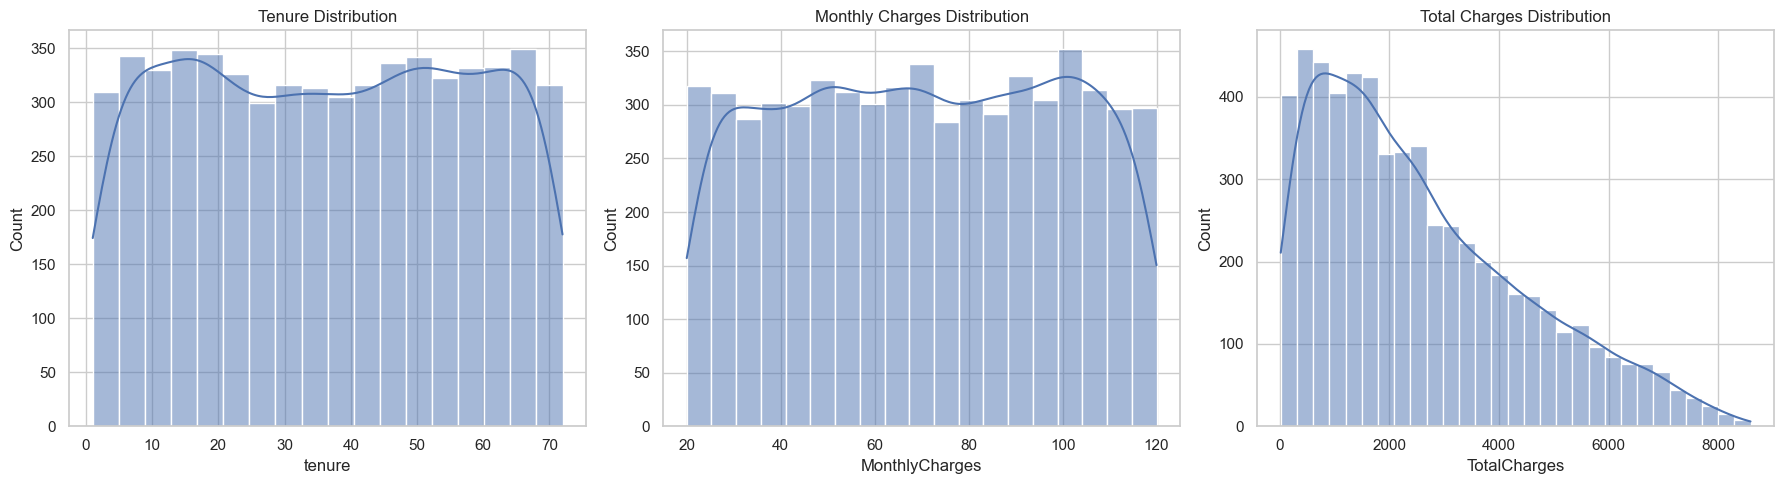

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Plotting distributions of numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure distribution
sns.histplot(df['tenure'], kde=True, ax=axes[0])
axes[0].set_title('Tenure Distribution')

# MonthlyCharges distribution
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')

# TotalCharges distribution
sns.histplot(df['TotalCharges'], kde=True, ax=axes[2])
axes[2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()

## Distribution of Categorical Features

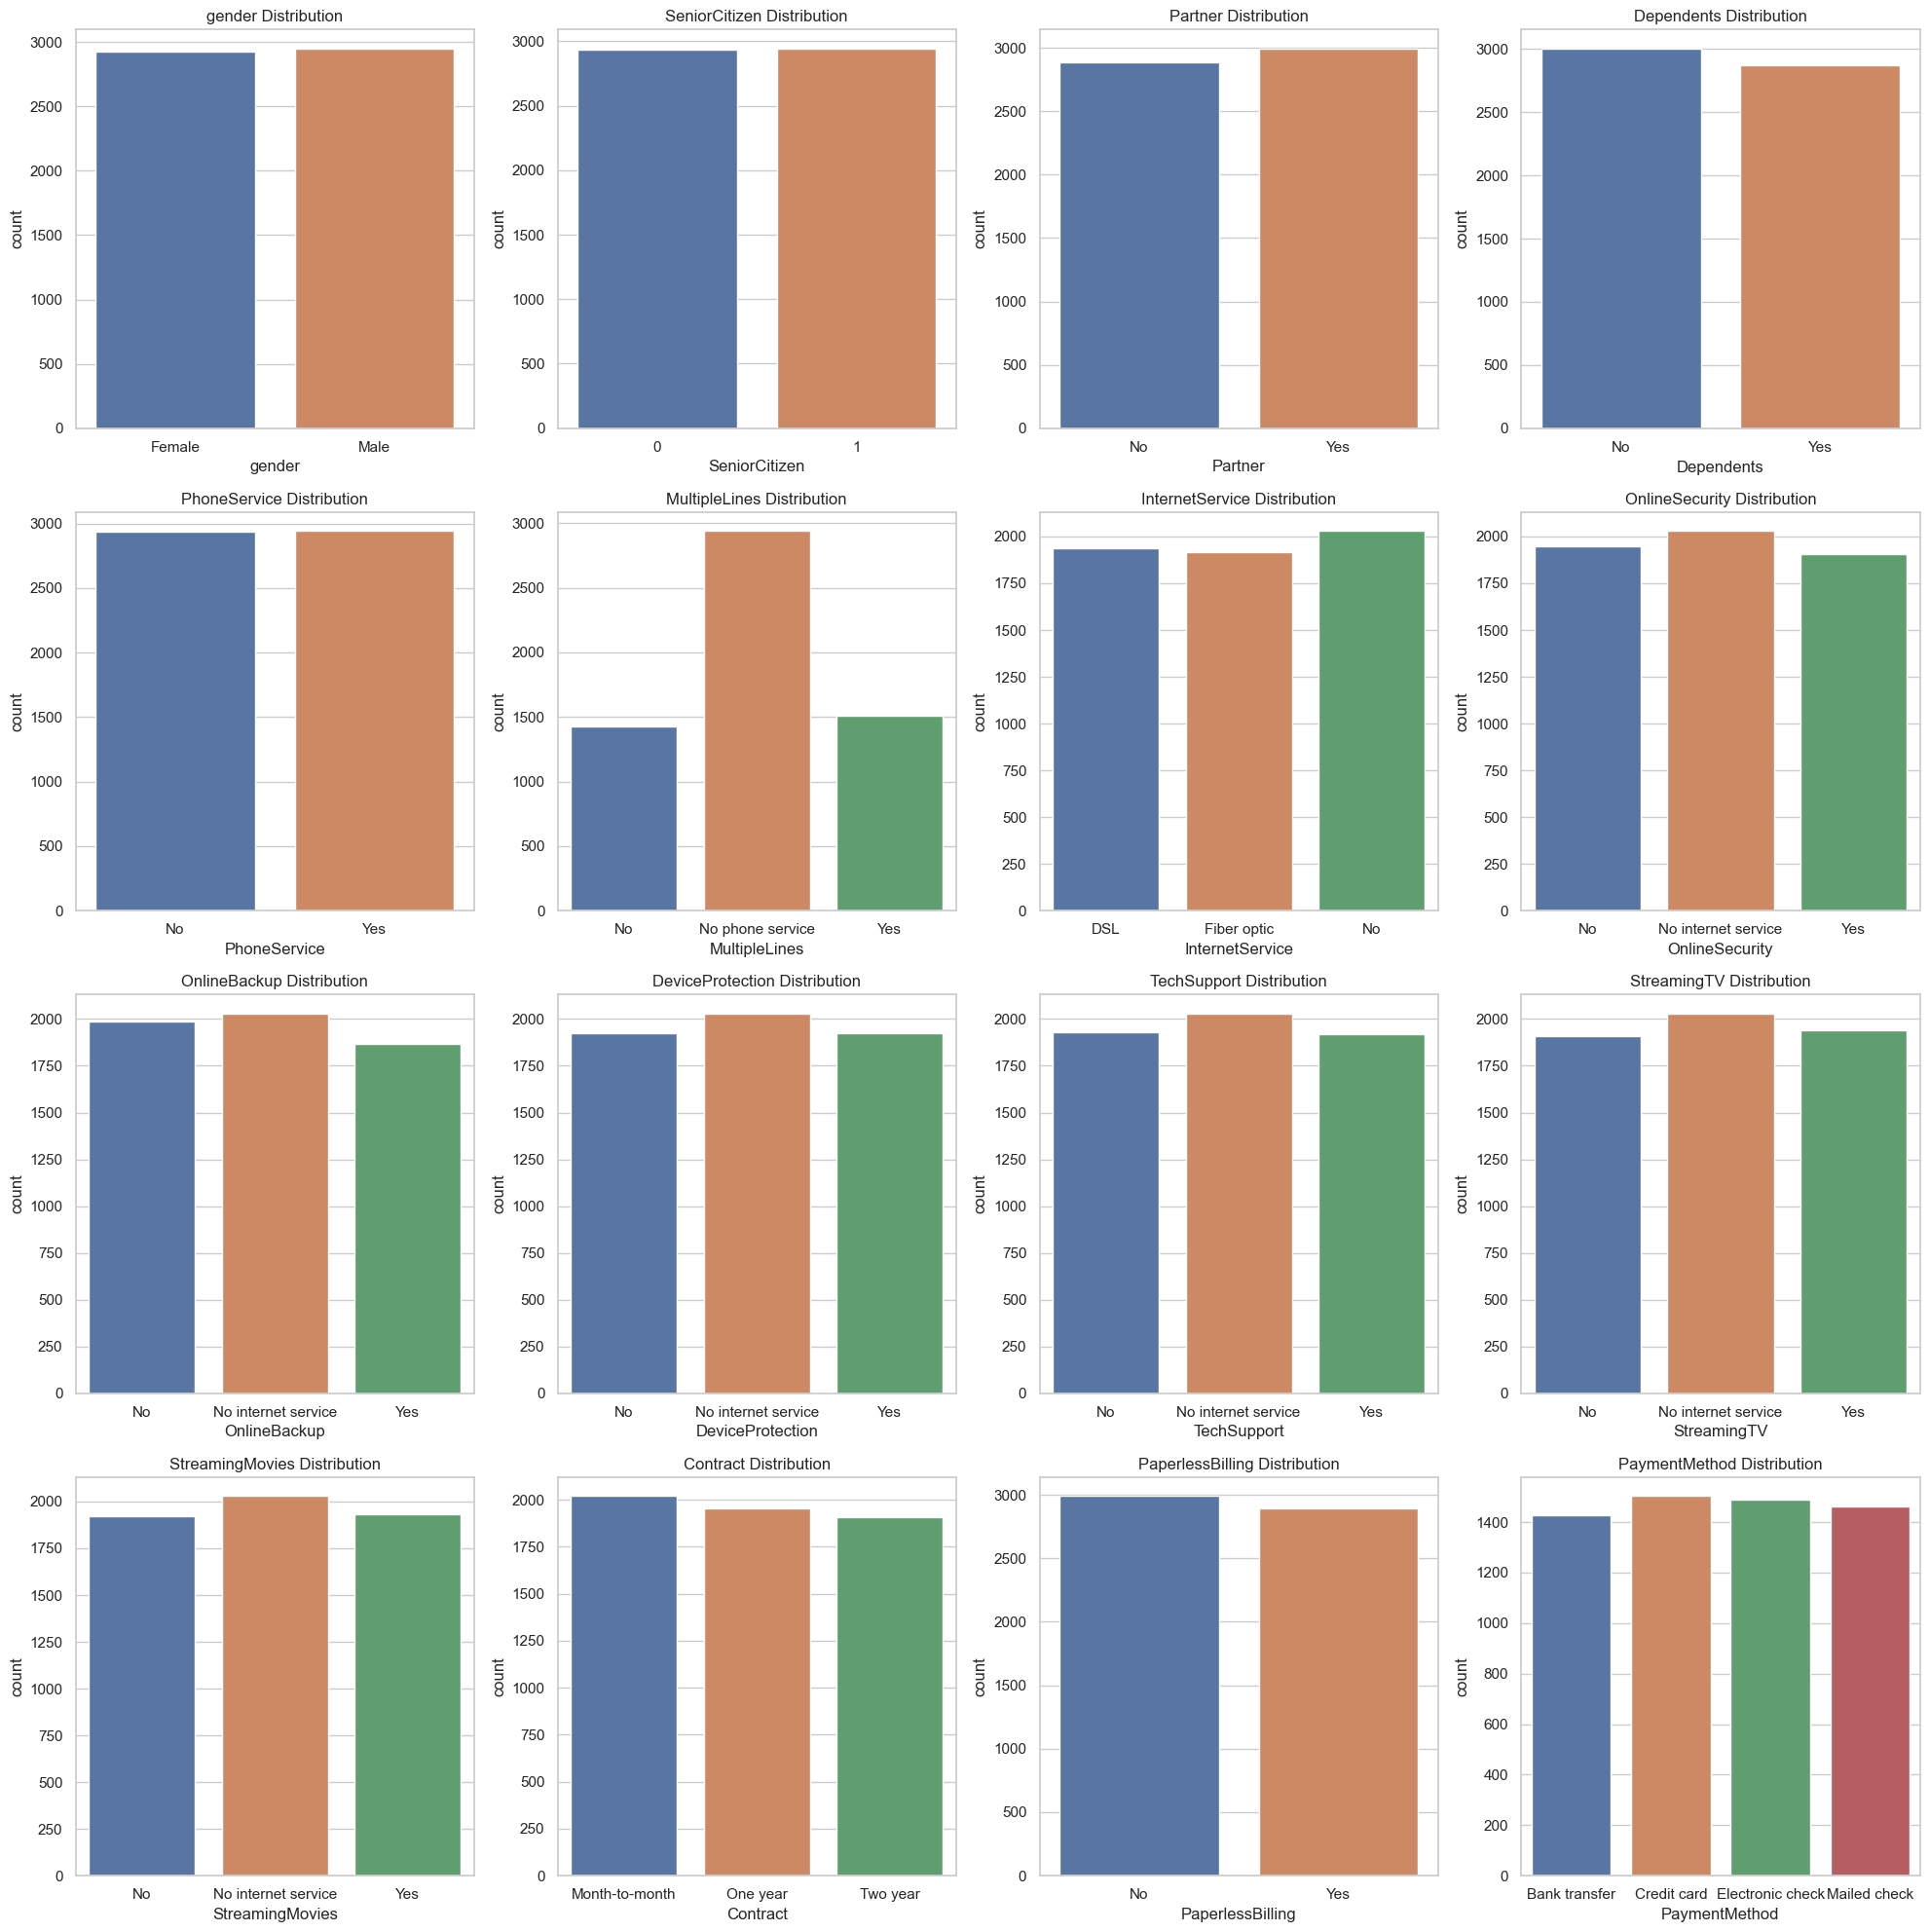

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting categorical features
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

## Churn Analysis

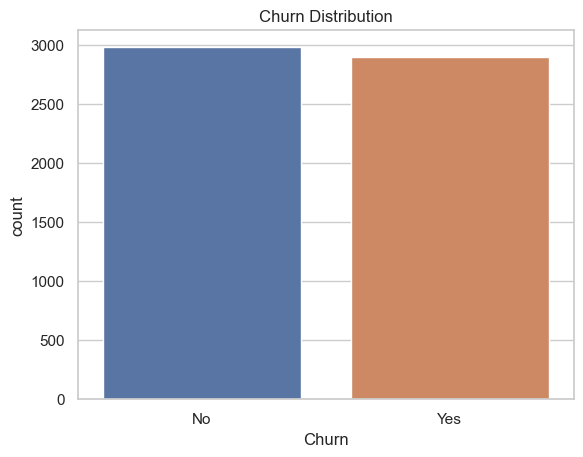

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# Churn Rate Across Different Demographics and Service features

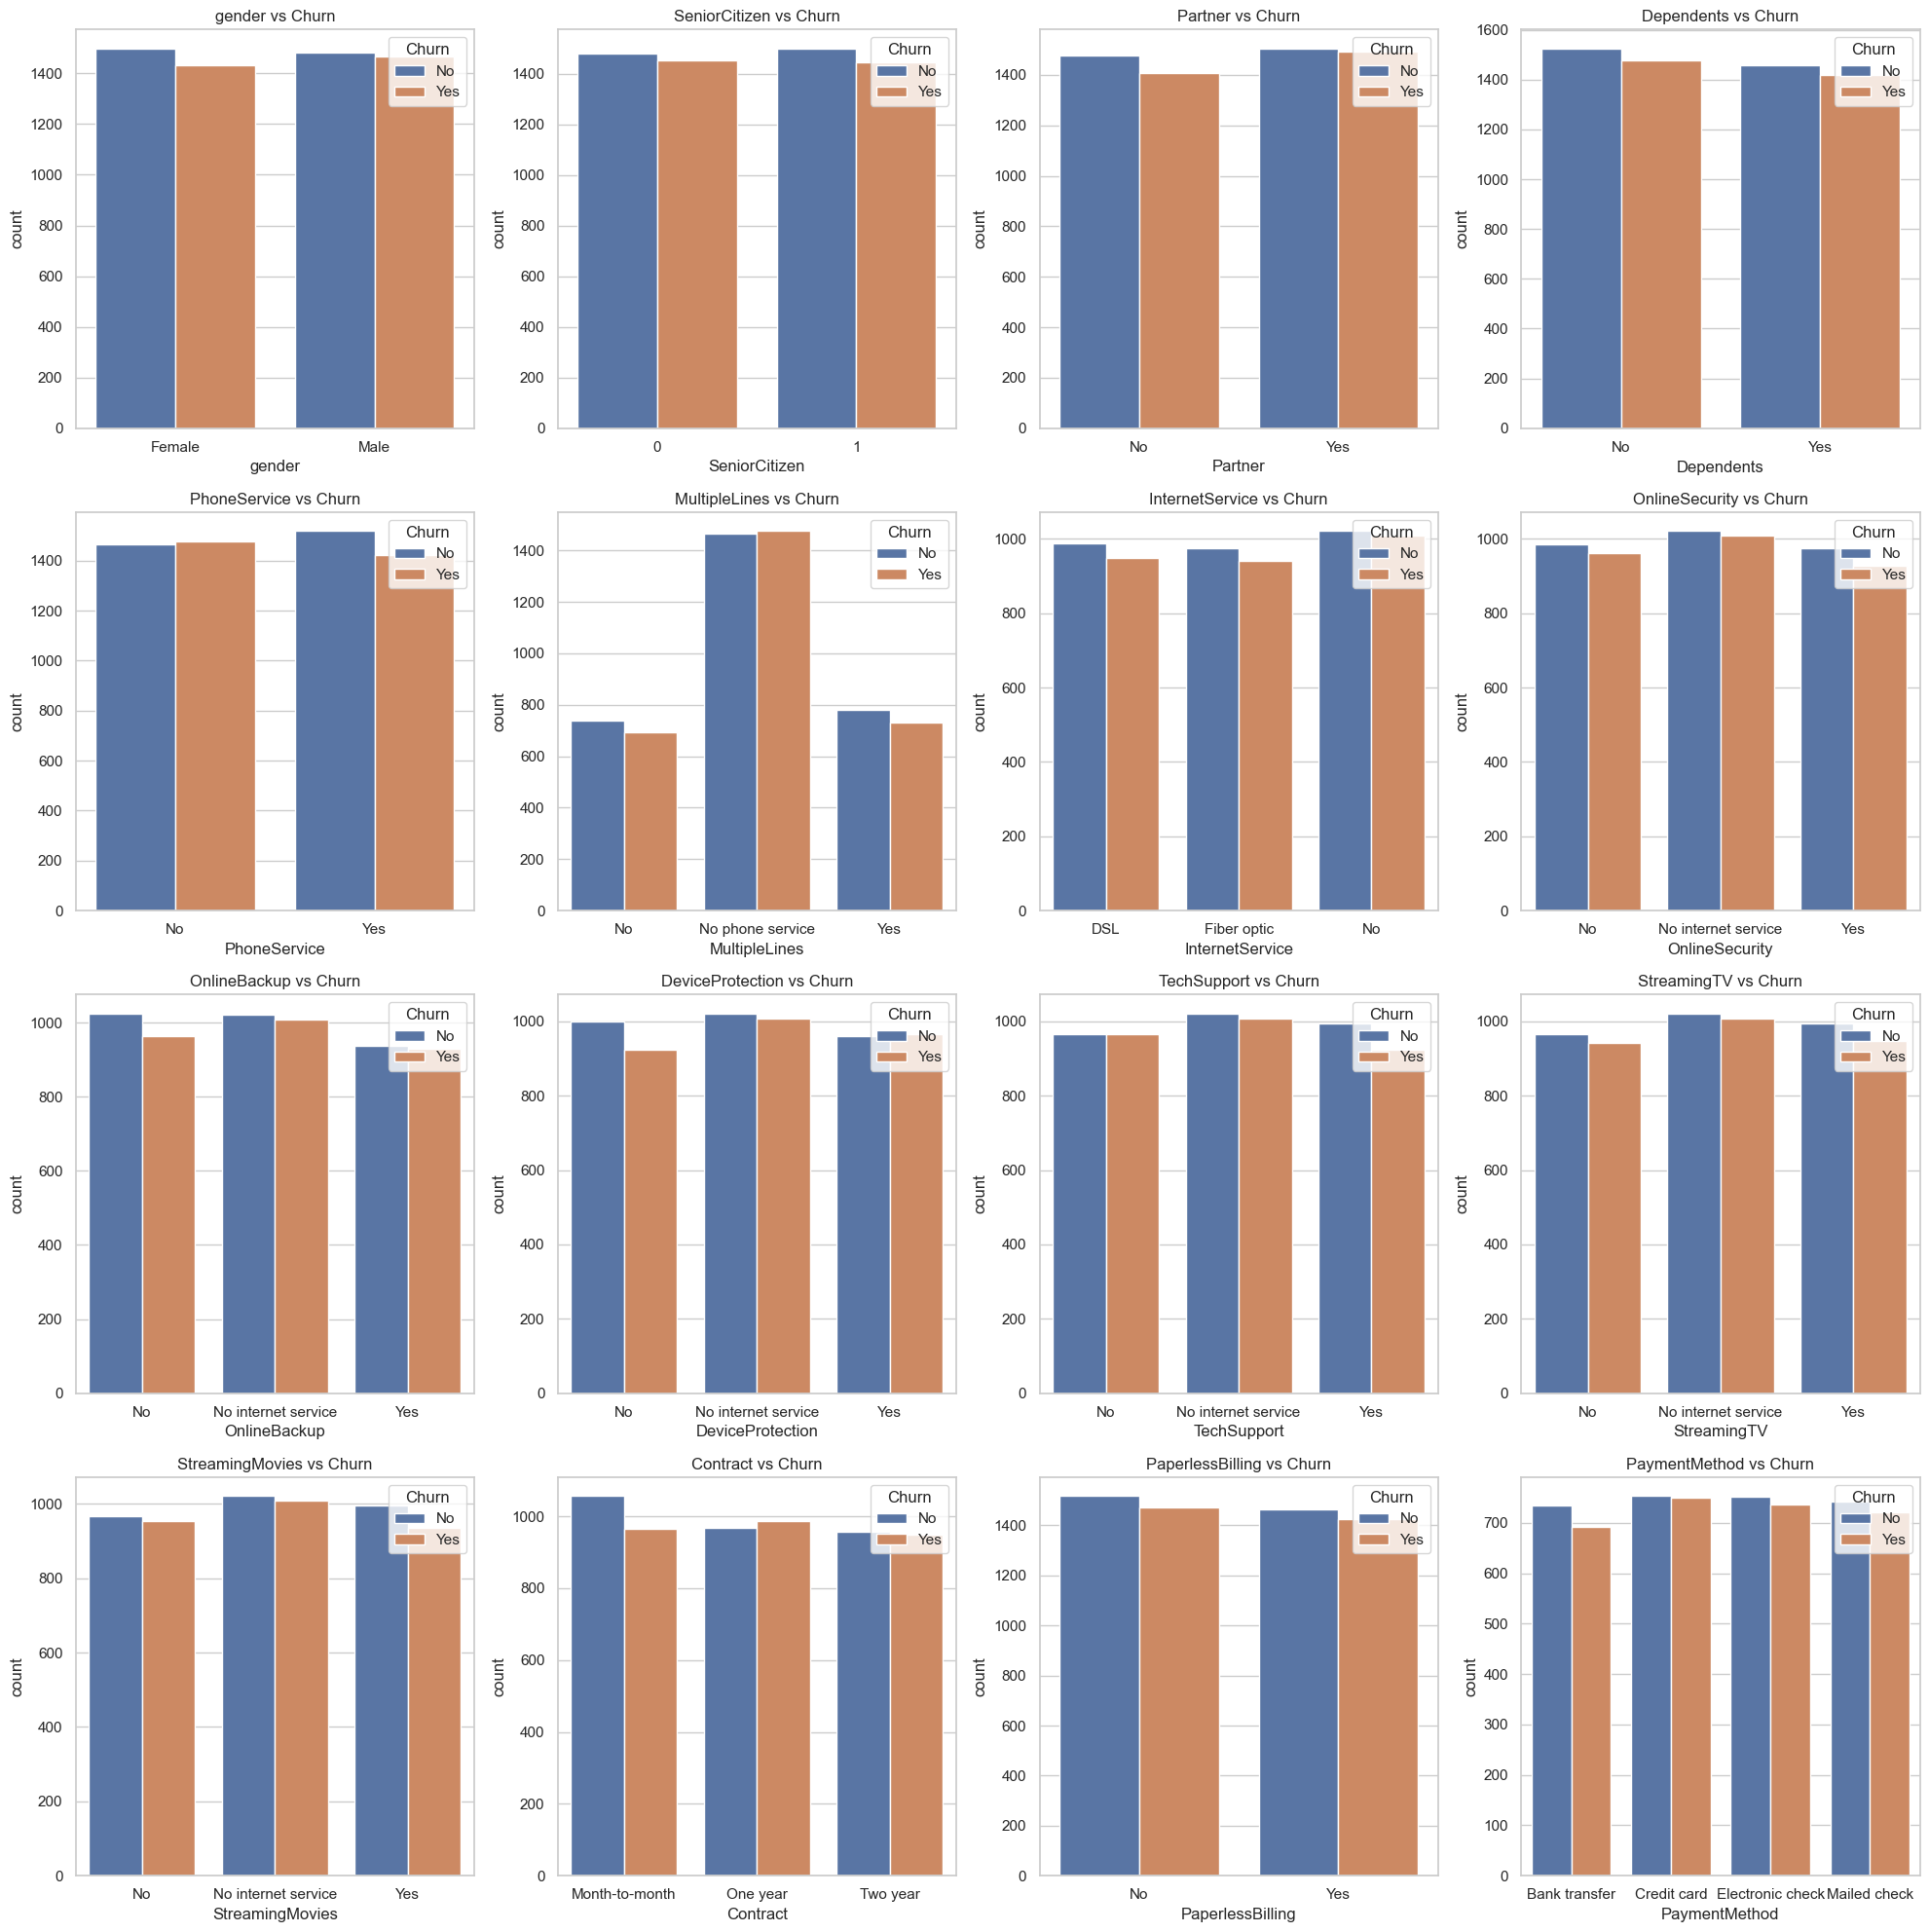

In [11]:
# Plotting churn rate across different demographics and service features
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()

## Correlation Analysis
Analyze the correlation between numerical features and churn

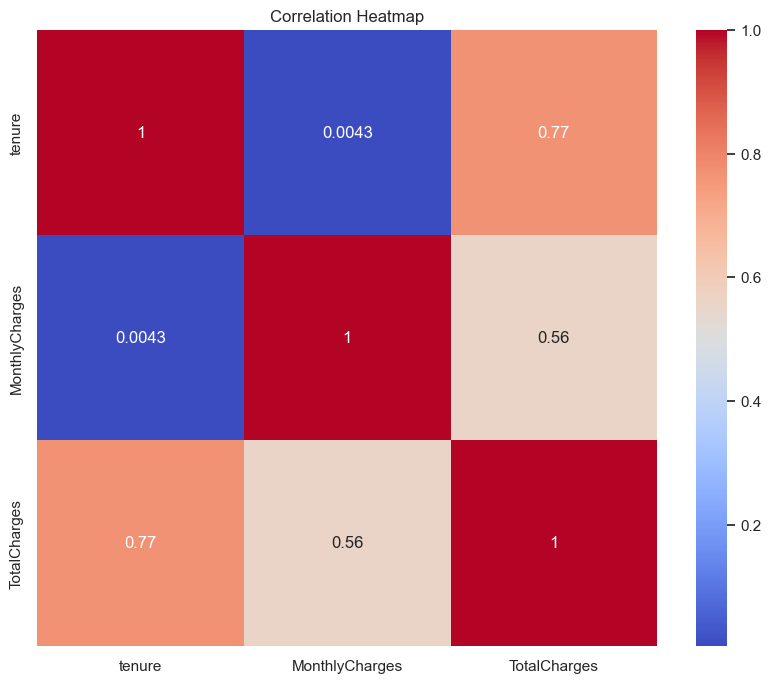

In [12]:
# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Feature Importance using Random Forest

Use Random Forest to identify the most important features contributing to churn

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoded_data = df.copy()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = encoded_data.drop(['customerID', 'Churn'], axis=1)
y = encoded_data['Churn']

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
17,MonthlyCharges,0.188848
18,TotalCharges,0.182081
4,tenure,0.155546
16,PaymentMethod,0.064702
14,Contract,0.046151
1,SeniorCitizen,0.031639
6,MultipleLines,0.031569
15,PaperlessBilling,0.030516
0,gender,0.029961
2,Partner,0.029412


In [14]:
feature_importances.to_csv('feature_importances.csv', index=False)

# 5. Customer Segmentation
Perform K-Mean clustering and analyze the clusters.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Convert 'Churn' column to numerical format
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select features for clustering
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features]

# Handle missing values
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Ensure that all columns used in groupby are numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn_numeric'] = pd.to_numeric(df['Churn_numeric'], errors='coerce')

# Analyze the clusters
# Filtering numeric columns only for the groupby operation
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']
cluster_analysis = df.groupby('Cluster')[numeric_features].mean()

# Count the number of observations in each cluster
cluster_analysis['Count'] = df['Cluster'].value_counts()

# Print the cluster analysis
print(cluster_analysis)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


            tenure  MonthlyCharges  TotalCharges  Churn_numeric  Count
Cluster                                                               
0        15.362162       71.684416   1122.091393       0.492723   2405
1        53.441956       95.653836   5055.976181       0.500884   1697
2        49.084364       43.758245   2145.241862       0.485377   1778


# 6. Survival Analysis
Analyze customer tenure using survival analysis to understand the duration until churn

C:\Users\HP\AppData\Local\Temp\ipykernel_7192\742611131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Churn'] = churn_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


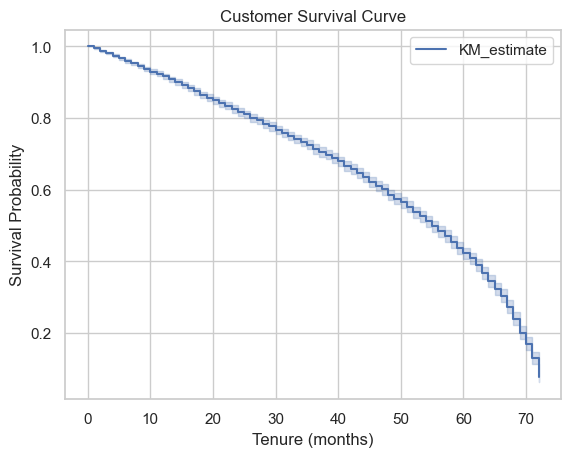

In [17]:
import lifelines
from lifelines import KaplanMeierFitter

# Prepare the data for survival analysis
churn_data = df[['tenure', 'Churn']]
churn_data['Churn'] = churn_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


kmf = KaplanMeierFitter()
kmf.fit(churn_data['tenure'], event_observed=churn_data['Churn'])
kmf.plot_survival_function()
plt.title('Customer Survival Curve')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability')
plt.show()

In [21]:
# Extract the survival function data
survival_df = kmf.survival_function_.reset_index()

# Save the survival analysis data to a CSV file
survival_df.to_csv('C:\\Users\HP\Downloads\Customer churn project\survival_analysis.csv', index=False)

print("Survival analysis data saved to survival_analysis.csv")

Survival analysis data saved to survival_analysis.csv


## Observations:
1. Survival Probability Axis (Y-Axis):
    The survival probability starts at 1.0 and decreases over time, which is typical. 
    This indicates that allcustomers are initially retained, and the probablity of retention decreases as tenure increases.
    
2. Tenure (X-Axis):The X-axis represents the tenure in months, showing how long customers have been with the company.
    Decreasing Survival Probability:The survival probability decreases steadily over time. 
    This indicates that the likelihood of customers churning increases as their tenure with the company increases.

# Interpretation:
## 1. Early Customer Retention:
Initially, the survival probability is high, indicating that most customers stay with the company during the early months of their tenure.
## 2. Steady Churn Over Time:
As time progresses, the survival probability decreases in a near-linear fashion. This suggests a steady rate of customer churn over time, without any significant drops or spikes at specific intervals.
## 3. Long-Term Customer Churn:
By around 70 months (5 years 10 months), the survival probability drops significantly. This indicates that customers who have been with the company for longer periods are less likely to be retained compared to newer customers.

## Implications for Business Strategy:

## 1. Customer Retention Programs:
        Implementing targeted customer retention programs early in the customer lifecycle can help maintain high survival probabilities. Focus on the first few months to reinforce customer loyalty.
        
## 2. Analyzing Churn Factors:
        Investigate specific factors contributing to churn as tenure increases. This can include evaluating customer satisfaction, service quality, and competitive offerings.
        
## 3. Long-Term Engagement:
        Develop strategies to engage and retain long-term customers, who may be at a higher risk of churning. Personalized offers, loyalty programs, and regular check-ins can help in retaining these customers.
        
## Conclusion:

The Kaplan-Meier survival curve provides valuable insights into customer retention patterns. By understanding how survival probability changes over time, the company can implement more effective strategies to reduce churn and improve overall customer retention.

## 7. Results and Interpretation

### Cluster 0:

    Tenure: Shorter tenure (around 15 months).
    
    Monthly Charges: Moderate monthly charges ($71.68).
    
    Total Charges: Lower total charges ($1122.09).
    
    Churn Rate: High churn rate (0.49).
    
    Count: 2405 customers

### Cluster 1:

    Tenure: Long tenure (around 53 months).
    
    Monthly Charges: Higher monthly charges ($95.65).
    
    Total Charges: Highest total charges ($5055.98).
    
    Churn Rate: Moderate churn rate (0.50).
    
    Count: 1697 customers
        
### Cluster 2:

    Tenure: Moderate tenure (around 49 months).
    
    Monthly Charges: Lowest monthly charges ($43.76).
    
    Total Charges: Moderate total charges ($2145.24).
    
    Churn Rate: Highest churn rate (0.49).
    
    Count: 1778 customers
        
## Implications for Business Strategy
### 1. Cluster 0:
Characteristics: Customers with shorter tenure, moderate monthly charges, and lower total charges. This group has a high churn rate. 
Strategies:

    1. Onboarding and Engagement: Implement robust onboarding processes and engagement strategies to help new customers derive value quickly.
    
    2. Promotions and Incentives: Offer promotions, discounts, or loyalty programs targeted at customers in the early months to encourage longer retention.
    
    3. Feedback Mechanism: Collect feedback from new customers to understand their pain points and address them promptly.
    
### 2. Cluster 1:
Characteristics: Customers with long tenure, high monthly charges, and the highest total charges. This group has a moderate churn rate. 
Strategies:

    1. Loyalty Programs: Enhance loyalty programs to reward long-term customers and encourage them to stay.
    
    2. Premium Services: Offer premium services or exclusive benefits to justify higher charges and enhance customer satisfaction.
    
    3. Customer Support: Provide excellent customer support to ensure any issues are resolved promptly, preventing dissatisfaction.
    
### 3. Cluster 2:
Characteristics: Customers with moderate tenure, the lowest monthly charges, and moderate total charges. This group also has a high churn rate. 
Strategies:

    1. Value Proposition: Communicate the value proposition effectively to ensure customers perceive the benefits of staying with the service.
    
    2. Cross-Selling: Identify opportunities for cross-selling or upselling additional services that align with customer needs.
    
    3. Retention Campaigns: Implement retention campaigns targeting customers who are approaching critical churn periods, offering personalized incentives.
    
## General Implications:
    1. High Churn Across Clusters: The churn rate is relatively high across all clusters (close to 0.50). This indicates a general issue with customer retention that needs to be addressed across the board.
    2. Customer Segmentation for Personalized Strategies: The distinct characteristics of each cluster suggest that personalized strategies should be implemented for each segment to effectively address their specific needs and preferences.
    3. Resource Allocation: Allocate resources strategically based on the profitability and potential lifetime value of each cluster. For example, customers in Cluster 1 with the highest total charges might deserve more investment in premium services and support.
    4. Monitoring and Adjustment: Regularly monitor the effectiveness of implemented strategies and be ready to adjust them based on customer feedback and changing trends.